In [ ]:
h={ 's' : 14,
   'c' : 11,
    'b' : 12,
    'f' : 11,
    'e' : 4,
    'd' : 6,
    'g' : 0}

print(h)


{'s': 14, 'c': 11, 'b': 12, 'f': 11, 'e': 4, 'd': 6, 'g': 0}


In [ ]:
graph = {
    's': {'c': 3, 'b': 4},
    'b': {'f': 5, 'e': 12},
    'c': {'e': 10, 'd': 7},
    'd': {'e': 2},
    'e': {'g': 5},
    'f': {'g': 16},
    'g': {}
}

print(graph)

{'s': {'c': 3, 'b': 4}, 'b': {'f': 5, 'e': 12}, 'c': {'e': 10, 'd': 7}, 'd': {'e': 2}, 'e': {'g': 5}, 'f': {'g': 16}, 'g': {}}


In [ ]:
# A star algorithm

import heapq

# Graph
graph = {
    'S': [('B', 4), ('C', 3)],
    'B': [('E', 12), ('F', 5)],
    'C': [('E', 10),('D',7)],
    'D': [('E', 2)],
    'E': [('G', 5)],
    'F': [('G', 16)],
    'G': []
}

# Heuristic values
h = {
    'S': 14,
    'B': 12,
    'C': 11,
    'D': 6,
    'E': 4,
    'F': 11,
    'G': 0
}

def astar(start, goal):
    open_list = []
    heapq.heappush(open_list, (h[start], 0, start, [start]))  # (f, g, node, path)
    closed_set = set()

    while open_list:
        f, g, current, path = heapq.heappop(open_list)

        if current in closed_set:
            continue
        closed_set.add(current)

        if current == goal:
            return path, g

        for neighbor, cost in graph[current]:
            if neighbor not in closed_set:
                g_new = g + cost
                f_new = g_new + h[neighbor]
                heapq.heappush(open_list, (f_new, g_new, neighbor, path + [neighbor]))

    return None, float('inf')

path, total_cost = astar('S', 'G')
print("Optimal Path:", " -> ".join(path))
print("Total Cost:", total_cost)

Optimal Path: S -> C -> D -> E -> G
Total Cost: 17


In [ ]:
from queue import PriorityQueue

def a_star(graph, start, goal, h):
    pq = PriorityQueue()
    pq.put((h[start], start, [start], 0))
    visited = set()

    while not pq.empty():
        f_score, current, path, g_score = pq.get()

        if current in visited:
            continue
        visited.add(current)

        if current == goal:
            return path, g_score

        for neighbor, cost in graph.get(current, []):
            if neighbor not in visited:
                g = g_score + cost
                f = g + h[neighbor]
                pq.put((f, neighbor, path + [neighbor], g))

    return None, float('inf')


graph = {
    'A': [('B', 6), ('F', 3)],
    'B': [('G', 2), ('C', 3)],
    'C': [('E', 5)],
    'D': [('C', 1), ('E', 8)],
    'E': [('I', 3), ('J', 5)],
    'F': [('G', 1), ('H', 7)],
    'G': [('E', 5), ('I', 2)],
    'H': [('I', 2)],
    'I': [('J', 7)],
    'J': []
}

# Heuristics
h = {
    'A': 10,
    'B': 8,
    'C': 5,
    'D': 7,
    'E': 3,
    'F': 6,
    'G': 5,
    'H': 3,
    'I': 1,
    'J': 0
}

# Run A*
path, cost = a_star(graph, 'A', 'J', h)
print("Path:", path)
print("Cost:", cost)

Path: ['A', 'F', 'G', 'I', 'J']
Cost: 13


Updated Cost:
D : {'OR': ['J']} >>> {'J': 1}
C : {'OR': ['G'], 'AND': ['H', 'I']} >>> {'H AND I': 2, 'G': 4}
B : {'OR': ['E', 'F']} >>> {'E OR F': 8}
A : {'OR': ['B'], 'AND': ['C', 'D']} >>> {'C AND D': 5, 'B': 9}
***************************************************************************
Shortest Path:
 A<--(C AND D) [C<--(H AND I) [H + I] + D<--J]


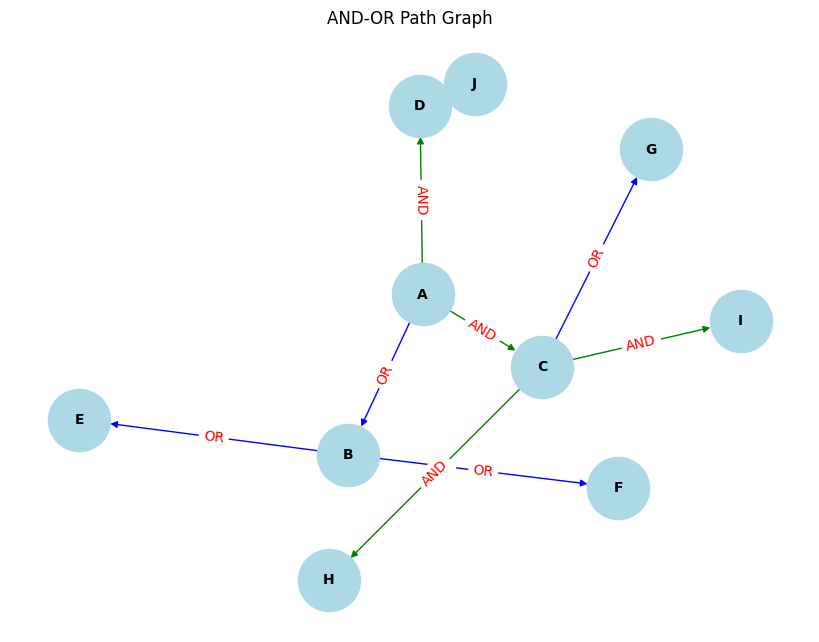

In [ ]:
# AO* star

def Cost(H, condition, weight = 1):
    cost = {}
    if 'AND' in condition:
        AND_nodes = condition['AND']
        Path_A = ' AND '.join(AND_nodes)
        PathA = sum(H[node]+weight for node in AND_nodes)
        cost[Path_A] = PathA

    if 'OR' in condition:
        OR_nodes = condition['OR']
        Path_B = ' OR '.join(OR_nodes)
        PathB = min(H[node]+weight for node in OR_nodes)
        cost[Path_B] = PathB
    return cost

# Update the cost
def update_cost(H, Conditions, weight=1):
    Main_nodes = list(Conditions.keys())
    Main_nodes.reverse()
    least_cost = {}
    for key in Main_nodes:
        condition = Conditions[key]
        print(key, ':', Conditions[key], '>>>', Cost(H, condition, weight))
        c = Cost(H, condition, weight)
        H[key] = min(c.values())
        least_cost[key] = Cost(H, condition, weight)
    return least_cost

# Print the shortest path
def shortest_path(Start, Updated_cost, H):
    Path = Start
    if Start in Updated_cost.keys():
        Min_cost = min(Updated_cost[Start].values())
        key = list(Updated_cost[Start].keys())
        values = list(Updated_cost[Start].values())
        Index = values.index(Min_cost)

        # FIND MINIMUM PATH KEY
        Next = key[Index].split()
        # ADD TO PATH FOR OR PATH
        if len(Next) == 1:
            Start = Next[0]
            Path += '<--' + shortest_path(Start, Updated_cost, H)
        # ADD TO PATH FOR AND PATH
        else:
            Path += '<--('+key[Index]+') '
            Start = Next[0]
            Path += '[' + shortest_path(Start, Updated_cost, H) + ' + '
            Start = Next[-1]
            Path += shortest_path(Start, Updated_cost, H) + ']'

    return Path


# Final Code with Visualization
import networkx as nx
import matplotlib.pyplot as plt

# Visualization of the graph based on the provided conditions
def visualize_graph(conditions, updated_cost, H):
    G = nx.DiGraph()

    # Add nodes and edges
    for node, condition in conditions.items():
        if 'AND' in condition:
            for n in condition['AND']:
                G.add_edge(node, n, label='AND', color='green')
        if 'OR' in condition:
            for n in condition['OR']:
                G.add_edge(node, n, label='OR', color='blue')

    pos = nx.spring_layout(G)  # positions for all nodes
    labels = nx.get_edge_attributes(G, 'label')
    colors = [G[u][v]['color'] for u, v in G.edges]

    # Draw the graph
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold', edge_color=colors, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
    plt.title('AND-OR Path Graph')
    plt.show()


# Example Usage:
H = {'A': -1, 'B': 5, 'C': 2, 'D': 4, 'E': 7, 'F': 9, 'G': 3, 'H': 0, 'I': 0, 'J': 0}

Conditions = {
    'A': {'OR': ['B'], 'AND': ['C', 'D']},
    'B': {'OR': ['E', 'F']},
    'C': {'OR': ['G'], 'AND': ['H', 'I']},
    'D': {'OR': ['J']}
}

# Weight
weight = 1

# Updated cost
print('Updated Cost:')
Updated_cost = update_cost(H, Conditions, weight)
print('*' * 75)

# Shortest Path
print('Shortest Path:\n', shortest_path('A', Updated_cost, H))

# Visualize the graph
visualize_graph(Conditions, Updated_cost, H)